In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from slugify import slugify
import dash
import dash_core_components as dcc
import dash_html_components as html
import warnings
warnings.filterwarnings('ignore')

In [31]:
xls = pd.ExcelFile("Honoraires_totaux_des_professionnels_de_sante_par_departement_en_2016.xls")
df = pd.read_excel(xls, "Spécialistes", na_values = na_values)
columns= ["Spécialités","Départements","Effectifs","Honoraires","Dépassements", "Déplacements", "Total"]
df.columns = columns
reg = r"(\d+)"
df["#Dep"] = df["Départements"].str.extract(reg)
dfWithoutTotal = df[~df["Départements"].str.contains("TOTAL")]
dfWithoutTotal = df[~df["Spécialités"].str.contains("TOTAL")]
df_na = dfWithoutTotal.dropna()
df_honoraire = df_na[df_na['Effectifs']!=0]
df_honoraire.head()

,Spécialités,Départements,Effectifs,Honoraires,Dépassements,Déplacements,Total,#Dep
0,02- Anesthésie-réanimation chirurgicale,01- Ain,17,4530079.33,2496180.45,0.0,7026259.78,01
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,19,4985259.62,373837.57,0.0,5359097.19,02
2,02- Anesthésie-réanimation chirurgicale,03- Allier,19,5102901.70,560978.59,0.0,5663880.29,03
5,02- Anesthésie-réanimation chirurgicale,06- Alpes-Maritimes,110,24853773.21,10816346.67,0.0,35670119.88,06
6,02- Anesthésie-réanimation chirurgicale,07- Ardèche,23,5271245.30,802542.01,0.0,6073787.31,07


In [62]:
df_spe = df_honoraire.groupby('Spécialités')['Effectifs','Honoraires','Dépassements'].sum()
df_spe.head()

,Effectifs,Honoraires,Dépassements
Spécialités,,,
02- Anesthésie-réanimation chirurgicale,3443,9.586784e+08,2.638767e+08
03- Pathologie cardio-vasculaire,4564,1.154262e+09,5.317715e+07
04- Chirurgie générale,963,1.700732e+08,8.781544e+07
05- Dermato-vénéréologie,2816,3.604786e+08,9.405530e+07
06- Radiodiagnostic et imagerie médicale,5298,2.523502e+09,1.860858e+08


In [67]:
df_sorted = df_spe.sort_values(by='Dépassements', ascending=False)
df_sorted.head()

,Effectifs,Honoraires,Dépassements
Spécialités,,,
15- Ophtalmologie,4597,1.257266e+09,4.369419e+08
41- Chirurgie orthopédique et traumatologie,2277,5.394212e+08,3.016017e+08
02- Anesthésie-réanimation chirurgicale,3443,9.586784e+08,2.638767e+08
07- Gynécologie obstétrique,3379,5.467300e+08,2.519320e+08
06- Radiodiagnostic et imagerie médicale,5298,2.523502e+09,1.860858e+08


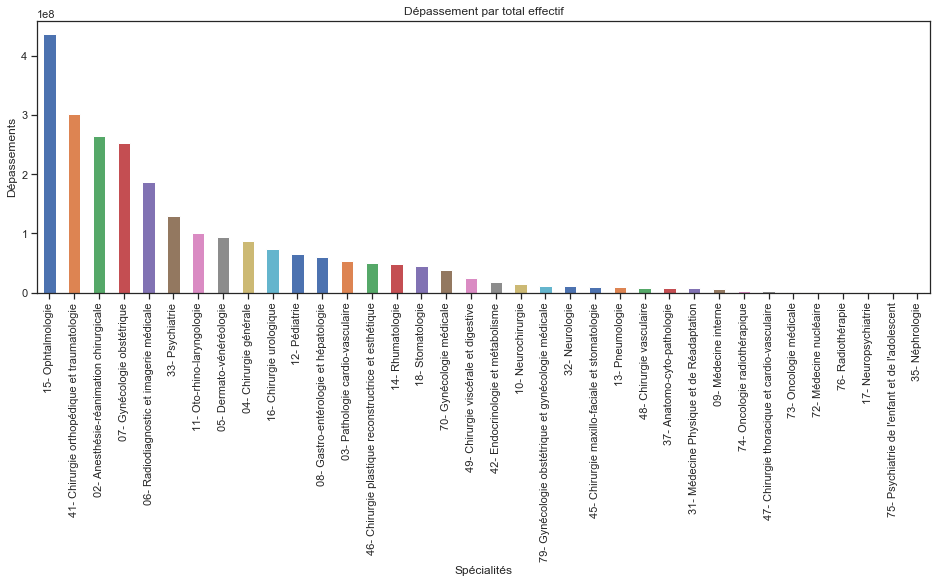

In [68]:
plt.figure(figsize=(16,5))
df_sorted['Dépassements'].plot(kind='bar', figsize=(16,5))
plt.xticks(rotation=90)
plt.ylabel('Dépassements')
plt.title("Dépassement par total effectif")
plt.show()

In [29]:
xls2 = pd.ExcelFile("estim-pop-dep-sexe-gca-1975-2018.xls")

In [48]:
df2 = pd.read_excel(xls2, "2018", skiprows=[0, 1, 2, 3], header=0, na_values=na_values)
df2.rename(columns={'Unnamed: 0': '#Dep', 'Total' : 'Population'}, inplace=True)
df_pop = df2[["#Dep", "Population"]]
df_pop = df_pop.dropna()
df_pop.head()

,#Dep,Population
0,01,649654.0
1,02,534286.0
2,03,338978.0
3,04,161664.0
4,05,141576.0


In [47]:
df_final = pd.merge(df_honoraire, df_pop , how='left', on="#Dep")
df_final.describe()

,Effectifs,Honoraires,Dépassements,Déplacements,Total,Population
count,1143.000000,1.143000e+03,1.143000e+03,1143.000000,1.143000e+03,1.104000e+03
mean,41.104112,9.197484e+06,2.117096e+06,133.816247,1.131471e+07,1.022224e+06
std,57.251042,1.198217e+07,5.153323e+06,809.766039,1.525156e+07,5.713438e+05
min,11.000000,5.712963e+05,2.940000e+02,0.000000,8.954919e+05,1.415760e+05
25%,16.000000,3.061373e+06,1.471763e+05,0.000000,3.713198e+06,5.669010e+05
50%,24.000000,5.245749e+06,7.371389e+05,0.000000,6.301796e+06,8.298390e+05
75%,47.000000,1.013674e+07,2.058710e+06,3.810000,1.275724e+07,1.401228e+06
max,1308.000000,1.290769e+08,7.107912e+07,11798.680000,1.958339e+08,2.613874e+06


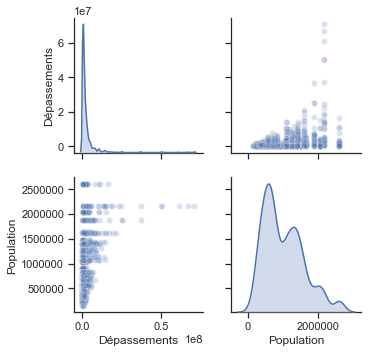

In [46]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df_final[['Dépassements', 'Population']], diag_kind="kde", plot_kws={'alpha': 0.2})
plt.show()

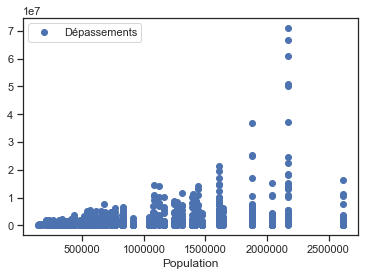

In [45]:
ax = df_final.plot(x="Population", y="Dépassements", style=['o', ''])

In [ ]:
app.layout = html.Div([
    dcc.Graph(
        id='test',
        figure={
            'data': [
                go.Scatter(
                    x=df_final[df_final['Population'] == i]['gdp per capita'],
                    y=df_final[df_final['Dépassements'] == i]['life expectancy'],
                    text=df_final[df_final['continent'] == i]['country'],
                    mode='markers',
                    opacity=0.7,
                    marker={
                        'size': 15,
                        'line': {'width': 0.5, 'color': 'white'}
                    },
                    name=i
                ) for i in df.continent.unique()
            ],
            'layout': go.Layout(
                xaxis={'type': 'log', 'title': 'GDP Per Capita'},
                yaxis={'title': 'Life Expectancy'},
                margin={'l': 40, 'b': 40, 't': 10, 'r': 10},
                legend={'x': 0, 'y': 1},
                hovermode='closest'
            )
        }
    )
])